In [22]:
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
import duckdb
import os
import glob
import matplotlib.pyplot as plt
import json
from tabulate import tabulate
from pathlib import Path
import seaborn as sns
from IPython.display import display
from memory_limits import duck_options
import glob
from IPython.display import display
from IPython.display import Markdown
from tabulate import tabulate


In [3]:
# new parquet files
mlhd_path = '../data/mlhd/*/*.parquet'
# mlhd_path = '/storage/mde48/research/musicdata/data/mlhd/*/*.parquet'
musicbrainz_path = '../data/musicbrainz.db'
stat_path = 'outputs'

#previous parquet files statistics
rec_stats = '/storage/mde48/research/musicdata/data/rec-id-stats.parquet'
release_stats = '/storage/mde48/research/musicdata/data/release-id-stats.parquet'
user_stats = '/storage/mde48/research/musicdata/data/user-id-stats.parquet'

conn = duckdb.connect(config=duck_options())
# conn.execute("SHOW TABLES").fetchall()
# conn.execute("DROP TABLE IF EXISTS mlhd_main")

# conn.execute(f"""SELECT user_id, rec_id,timestamp, COUNT(*) AS num_occurrences 
# FROM read_parquet('{mlhd_path}') WHERE user_id = '79d5d266-1f6c-4fcd-bf11-4e09804b160f'
# GROUP BY user_id, rec_id, timestamp
# HAVING COUNT(*) > 1
# ORDER BY num_occurrences DESC;""").fetchdf()

-1 -1 270210306048


In [12]:
#check musicbraniz
brainz_conn = duckdb.connect(musicbrainz_path)
brainz_conn.execute("select * from mb_artist where gender is NULL").fetchdf()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,artist_id,name,gender,type
0,7f1271e5-cbfc-4ef5-8077-7c7181b6cafd,Bricklin,None,Group
1,14ac1236-3cb6-4c02-be83-e4949d59e26f,Monkey House,None,Group
2,7e987529-210e-4c5e-b344-15cfb7349307,Soda,None,Group
3,d2674f9b-c46c-40ae-9b52-b753d19a2021,Blood or Whiskey,None,Group
4,a81f7041-7cd7-4080-ba88-9ce5fe50dc19,Mint Condition,None,Group
...,...,...,...,...
1290778,2d4d6643-2007-48f2-b3ee-2d4ca945690b,Dadazuzu,None,None
1290779,481aa019-c155-40ba-ab57-4155ac4fde6a,Catnip Overdose,None,None
1290780,7476dd6b-b255-4bbc-aa6f-5b11d399dc1f,Bedrängnis,None,Group
1290781,cab3cd1a-1238-45b0-896e-6756a2d0de1a,Interpol,None,Group


In [11]:
mlhd_path = '../data/mlhdv2/*.parquet'
# mlhd_path = "/storage/mde48/research/musicdata/data/mlhd/*/*.parquet"
# conn.execute(f"""SELECT user_id, COUNT(*) AS num_occurrences, MIN(timestamp) AS first_time, MAX(timestamp) AS last_time 
# FROM read_parquet('{mlhd_path}') WHERE user_id = 100255655
# GROUP BY user_id
# ORDER BY num_occurrences DESC;""").fetchdf()
data10 = conn.execute(f"select * from read_parquet('{mlhd_path}') where to_timestamp(timestamp) >= '2015-01-01'").fetchdf()
data10

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,user_id,timestamp,artist_id,release_id,rec_id


In [14]:
conn.execute(f"select * FROM read_parquet('../data/mlhd_ids.parquet') where entity_uuid='b1904e0f-0c3c-4904-948f-c18d508ebf0a';").fetchdf()

,entity_type,entity_uuid,id_num
0,user_id,b1904e0f-0c3c-4904-948f-c18d508ebf0a,100255655


In [11]:
conn.execute(f"select * from read_parquet('{rec_stats}')").fetchdf()

IOException: IO Error: No files found that match the pattern "/storage/mde48/research/musicdata/data/rec-id-stats.parquet"

In [13]:
conn.execute(f"select * from read_parquet('{release_stats}') order by first_time").fetchdf()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,release_id,n_records,first_time,last_time
0,294de630-7628-456e-aeab-7b65941f89b2,29566,1108339201,1378542033
1,280bffe4-a8f1-4d9b-abf2-205e0ab936a5,18557538,1108339201,1380508048
2,b0d7c511-139c-42ab-b9b5-2e5366efc52c,644075,1108339202,1380406961
3,992a052d-2f2e-3276-b9cf-c068b2dafa2a,1134136,1108339202,1380389139
4,717b5af5-3552-450e-8505-732872c2fe32,3256880,1108339202,1380549631
...,...,...,...,...
944674,0d8aa524-2be0-4768-85f8-c6d6c9a6a0a3,1,1380455894,1380455894
944675,256ee6ea-fe68-4344-a9db-ca25ed2872fb,19,1380468504,1380548456
944676,b381b8bf-2d7e-4b31-86cc-e4189cff9727,13,1380523690,1380525306
944677,7642d779-4b00-42e6-a439-ff8f0f5987ba,1,1380526080,1380526080


In [15]:
conn.execute(f"select * from read_parquet('{user_stats}') order by first_time").fetchdf()

,user_id,n_records,first_time,last_time
0,b1904e0f-0c3c-4904-948f-c18d508ebf0a,111563,1108339201,1364411360
1,a8888b03-351c-47f5-b05d-9fd1cac7675a,58920,1108339201,1355423492
2,c77b81b5-f291-41be-81b6-0479ab8770a7,145184,1108339202,1379109395
3,292d844c-d429-44ad-9320-e718d6b1e875,146307,1108339202,1351324082
4,9a4c2e0a-9dec-4171-bdd2-2e9a32aacff9,90178,1108339202,1375896727
...,...,...,...,...
594410,a42fabc2-8bb6-4ec2-b910-302c5cbed713,32880,1375878132,1378471917
594411,7bb867f9-6f4b-439b-9de0-d966a9e93f1c,1066,1375950058,1380072738
594412,091f37d8-3e9d-4db4-b4ca-c6c0d1eff58f,80,1376363559,1377118324
594413,03dd8a47-1247-4987-b435-cd3eb606a3e3,411,1378492760,1379973029


In [40]:
mlhd_path = '/storage/mde48/research/musicdata/data/mlhd/*/*.parquet'
conn.execute("SELECT COUNT(*) FROM read_parquet('/mde48/research/musicdata/data/mlhd/*/*.parquet')").fetchall()
	# 20921363870
# 2107961267

IOException: IO Error: No files found that match the pattern "/mde48/research/musicdata/data/mlhd/*/*.parquet"

In [ ]:
query = f"""COPY (
    SELECT 
        rec_id,
        COUNT(*) AS n_records,
        MIN(timestamp) AS first_time,
        MAX(timestamp) AS last_time
    FROM read_parquet('{mlhd_path}')
    GROUP BY rec_id
) TO 'rec-id-stats.parquet' (COMPRESSION zstd);"""
# conn.execute(query)

In [7]:
query = f"""COPY (
    SELECT 
        user_id,
        COUNT(*) AS n_records,
        MIN(timestamp) AS first_time,
        MAX(timestamp) AS last_time
    FROM read_parquet('{mlhd_path}')
    GROUP BY user_id
) TO 'user-id-stats.parquet' (COMPRESSION zstd);"""
conn.execute(query)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [9]:
query = f"""COPY (
    SELECT 
        release_id,
        COUNT(*) AS n_records,
        MIN(timestamp) AS first_time,
        MAX(timestamp) AS last_time
    FROM read_parquet('{mlhd_path}')
    GROUP BY release_id
) TO 'release-id-stats.parquet' (COMPRESSION zstd);"""
conn.execute(query)

../data/mlhd/*/*.parquet


In [34]:
conn.execute("select * from read_parquet('release-id-stats.parquet') order by first_time").fetchdf()

,release_id,n_records,first_time,last_time
0,300849293,18557538,1108339201,1380508048
1,300108145,29566,1108339201,1378542033
2,300635884,882329,1108339202,1380477388
3,300875908,117465,1108339202,1379918353
4,300869992,644075,1108339202,1380406961
...,...,...,...,...
944674,300320102,1,1380455894,1380455894
944675,300761986,19,1380468504,1380548456
944676,300705620,13,1380523690,1380525306
944677,300092504,1,1380526080,1380526080


In [4]:
# mlhd_path = '../data/mlhd/*/*.parquet'
conn.execute(f"select * from read_parquet('{mlhd_path}') order by timestamp desc LIMIT 20").fetchdf()
# query = f"""
#     SELECT SUM(n_records) AS total_records FROM (
#         SELECT user_id, rec_id, timestamp, COUNT(*) AS n_records
#         FROM read_parquet('{mlhd_path}')
#         GROUP BY 1,2,3
#     ) AS sub
# """
# conn.execute(query).fetchdf()
# conn.execute(f"select user_id, rec_id,timestamp, count(*) as n_records from read_parquet('{mlhd_path}') group by 1,2,3 order by n_records desc").fetchdf()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,user_id,timestamp,artist_ids,release_id,rec_id
0,d426e099-4aae-4aaf-b2f9-4f6b6e17e453,2108615084,"[494e8d09-f85b-4543-892f-a5096aed1cd4, fb75bc7...",93746222-c422-4bcc-b636-42d04370fa9f,ed8c6d63-191e-4a2a-94bd-cd2dd1e6e55d
1,ea5abce7-f65b-4fb0-8592-f26babc20a6d,2094214967,[ba759031-aa0c-471c-bb20-7817dbe68fde],ea0364b3-121e-4f42-906f-56a28e92ad46,c5dc1d0a-b92a-48e8-8232-68009de907b3
2,b26b87b8-ec31-429a-99d3-2f9aec3528c2,2084779763,[5b11f4ce-a62d-471e-81fc-a69a8278c7da],e9544e19-a275-43f9-8f5a-7feca484d8b1,ae719100-daea-4023-a7b7-1089e5bf61dd
3,02d07ce6-4c32-4aba-906e-f0028d9d4fce,2084675466,[95bab79d-e5e8-4d7a-9368-d51430763c69],8ef0adf9-dc38-406f-bc86-65d75bea3747,2101eaff-c4aa-413f-9cbd-b4ffe9729b4e
4,77650f39-52f5-4d33-bb4c-c097c311934c,2084552622,[23a32153-7314-4359-a5cd-9e584fe83504],3de7a493-be70-401f-9c8d-742ed13cb1bd,82154684-4e08-4d93-87d9-99e9514ab311
5,9fd12304-fbf3-47c8-b1c0-9deb403430d2,2084239485,[94219793-a46b-4c39-9397-e05ad633f32d],d87197f3-0e43-32da-82ed-f479597eeea6,deeb37b2-7115-4da4-886c-d7d4c85d4fc0
6,e3fbc7d4-6d31-41f5-a326-0e09873e4546,2076962897,[ca891d65-d9b0-4258-89f7-e6ba29d83767],46dddad8-59a8-4545-bc9b-34ab8aaebeff,23be0e8f-fdf0-4220-9954-6cf55a09dcaa
7,ad71f774-7212-4a8e-8117-ae909b5ea467,2076962897,[84eac621-1c5a-49a1-9500-555099c6e184],b8c3b691-5801-3aa2-8ab6-2fd7e54509fd,b675cf05-17da-472d-8197-9f44bc968f7f
8,4cd72cf0-2b7a-4f40-a5df-7d34a43e1305,2075736342,[a2e815a8-54d1-405f-a3b2-1fc9367ed0d3],e316d316-d185-472c-9392-95879059509d,fafd17cc-636a-46bb-86dc-5c506a6564a2
9,9a63750d-b93f-4a78-a96c-a9418aaa82af,2075736342,[bdacc37b-8633-4bf8-9dd5-4662ee651aec],bc12b734-522d-4cc2-8bef-bcf8444f7352,1902046b-2587-44d5-abbf-255941049bb2


In [5]:
conn.close()

In [4]:
conn = duckdb.connect('../data/mlhd.db')
conn.execute("SELECT COUNT(*) FROM mlhd_plays").fetchdf()
# 20658034565

CatalogException: Catalog Error: Table with name mlhd_plays does not exist!
Did you mean "sqlite_temp_master"?
LINE 1: SELECT COUNT(*) FROM mlhd_plays
                             ^

In [ ]:
conn = duckdb.connect(config=duck_options())
data_end = '2019-01-01'
conn.execute(f"""select * from read_parquet('{mlhd_path}') WHERE to_timestamp(timestamp) >'{data_end}'
 """).fetchdf()

In [ ]:
brainz_conn = duckdb.connect(musicbrainz_path)
brainz_conn.execute("select * from mb_artist where gender is null or gender='not applicable' limit 10 ").fetchdf()

In [ ]:
conn.execute(f"select * from read_parquet('../data/mlhdv2.parquet') where to_timestamp(timestamp)>='2005-01-01'").fetchdf()

In [18]:
mlhd_ids_path = "../data/mlhd_ids.parquet"
mlhd_path = '../data/mlhdv2/*.parquet'
# conn.execute(f"""create temp table mlhd_ids as 
#                 select * from read_parquet('{mlhd_ids_path}') 
#                 ORDER BY entity_uuid""") 
# conn.execute(f"attach '{musicbrainz_path}' as musicbrainz")
    

    ##
 
# conn.execute(f"""
# create temp table artists as
#     SELECT 
#         artist_uuid.id_num AS artist_id,
#         mb_artist.gender AS gender,
#         mb_artist.type AS type
#     FROM musicbrainz.mb_artist as mb_artist
#     RIGHT JOIN (SELECT * FROM mlhd_ids WHERE entity_type = 'artist_ids') 
#                  AS artist_uuid
#         ON artist_uuid.entity_uuid = mb_artist.artist_id
# """)
    
# conn.execute("detach musicbrainz")

gender_count_query = f"""
    SELECT 
        a.gender AS gender,
        COUNT(user_id) AS n_plays,  
        COUNT(DISTINCT mlhd.user_id) AS n_users, 
        COUNT(DISTINCT mlhd.artist_id) AS unique_count
    FROM 
        (SELECT artist_id, user_id FROM read_parquet('{mlhd_path}')) mlhd
    LEFT JOIN 
        artists a
    USING (artist_id)
    GROUP BY gender
    ORDER BY n_plays DESC
"""

data=conn.execute(gender_count_query).fetchdf()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

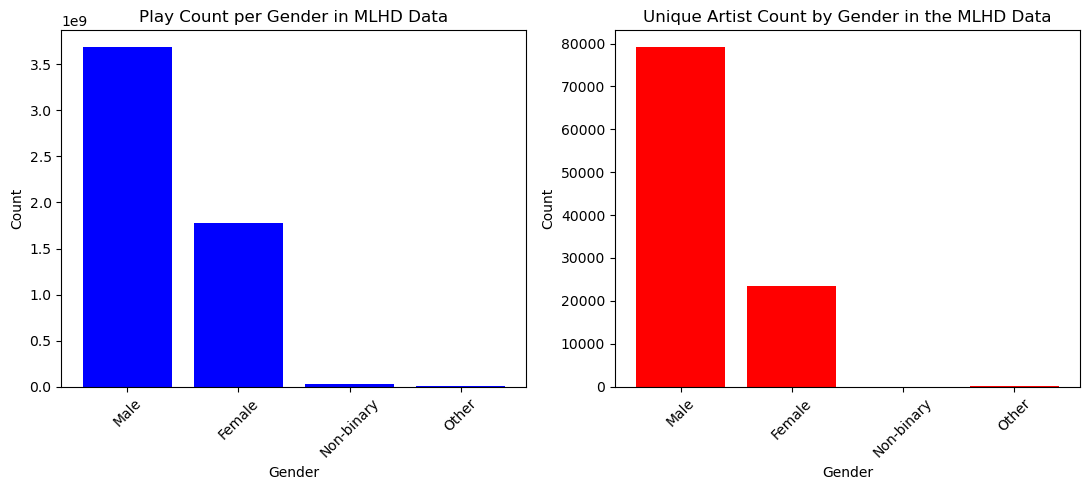

In [21]:
data['gender'] = data['gender'].fillna('Unknown')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5)) 

ax1.bar(data['gender'], data['n_plays'], color='b') 
ax1.set_title("Play Count per Gender in MLHD Data")
ax1.set_xlabel("Gender")
ax1.set_ylabel("Count")
ax1.tick_params(axis='x', rotation=45)

ax2.bar(data['gender'], data['unique_count'], color='r') 
ax2.set_title("Unique Artist Count by Gender in the MLHD Data")
ax2.set_xlabel("Gender")
ax2.set_ylabel("Count")
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()  
plt.show()

In [23]:
unique_count_query = f"""
    SELECT 
        COUNT(DISTINCT rec_id) AS n_tracks,  
        COUNT(DISTINCT artist_id) AS n_artists,  
        COUNT(DISTINCT release_id) AS n_releases, 
        COUNT(DISTINCT user_id) AS n_users  
    FROM (
        SELECT 
            rec_id, 
            artist_id, 
            release_id, 
            user_id
        FROM read_parquet('{mlhd_path}')
    ) AS unnested_data
"""


conn.execute(unique_count_query).fetchdf()


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,n_tracks,n_artists,n_releases,n_users
0,2426360,102601,383537,594218
